In [8]:
using FFTW, WaveFD, PyPlot, Statistics

In [9]:
# time axis:
t = collect(0.0:0.004:4.0)

# frequency axis:
fn = 1 / (2*0.004)
df = fn / (length(t)/2+1)
f = collect(0.0:df:df*(length(t)/2))

# sine wavelet:
wav = WaveletSine(a = 1.0, f = 15.0)
wSine = get(wav, t)

# ricker wavelet:
wav = WaveletRicker(a = 1.0, f = 15.0)
wRicker = get(wav, t .- mean(t))

# minimum phase ricker wavelet:
wav = WaveletMinPhaseRicker(a = 1.0, f = 15.0)
wMinPhaseRicker = get(wav, t)

# minimum phase ricker with cosine taper:
wav = WaveletMinPhaseRicker(a = 1.0, f = 15.0, tmax = 0.14)
wMinPhaseRickerMaxT = get(wav, t)

# integrated ricker wavelet:
wav = WaveletRicker(a = 1.0, f = 15.0, integrate = true)
wIntegratedRicker = get(wav,t .- mean(t))

# causal zero phase ricker wavelet:
wav = WaveletCausalRicker(a = 1.0, f = 15.0)
wCausalRicker = get(wav,t)

# Ormsby wavelet:
wav = WaveletOrmsby(a=1.0, f1=10.0, f2=20.0, f3=70.0, f4=80.0)
wOrmsby = get(wav, t .- mean(t))

# Integrated Ormsby wavelet:
wav = WaveletOrmsby(a=1.0, f1=10.0, f2=20.0, f3=70.0, f4=80.0, integrate=true)
wIntegratedOrmsby = get(wav, t .- mean(t))

# minimum phase Ormsby wavelet:
wav = WaveletMinPhaseOrmsby(a=1.0, f1=10.0, f2=20.0, f3=70.0, f4=80.0)
wMinPhaseOrmsby = get(wav, t)

# successive phase-shifts on a Ricker
wav1 = get(WaveletRicker(a=1.0, f = 8.0, phase=0.0), -.5 .+ 0.004*collect(0:511))
wav2 = get(WaveletRicker(a=1.0, f = 8.0, phase=pi/4), -.5 .+ 0.004*collect(0:511))
wav3 = get(WaveletRicker(a=1.0, f = 8.0, phase=pi/2), -.5 .+ 0.004*collect(0:511))
wav4 = get(WaveletRicker(a=1.0, f = 8.0, phase=3pi/4), -.5 .+ 0.004*collect(0:511));

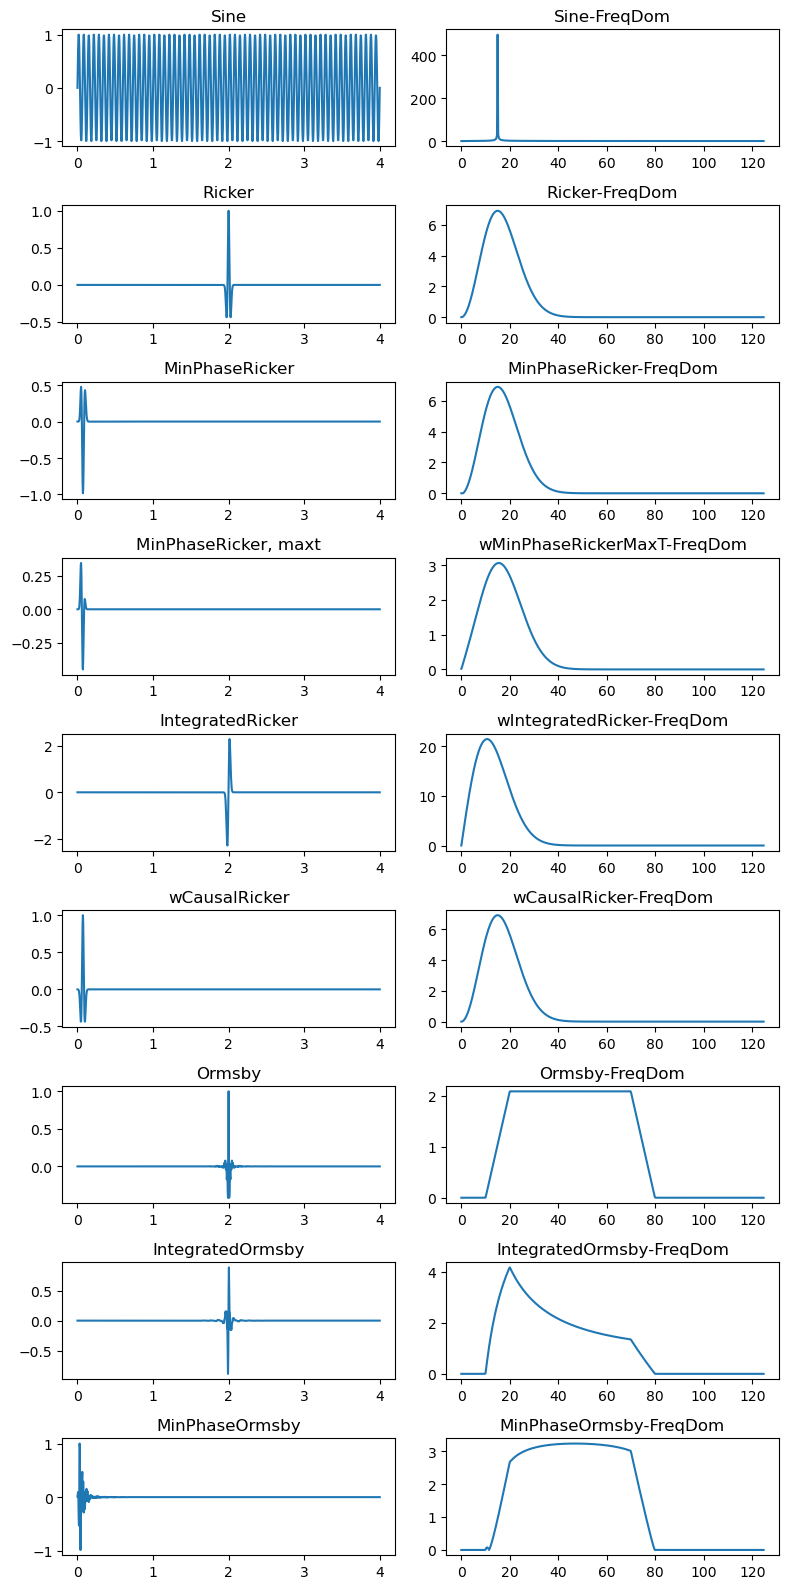

In [10]:
figure(1);close();figure(1,figsize=(8,16));clf()

subplot(9,2,1); plot(t,wSine);title("Sine")
subplot(9,2,2); plot(f,abs.(rfft(wSine)));title("Sine-FreqDom")

subplot(9,2,3); plot(t,wRicker);title("Ricker")
subplot(9,2,4); plot(f,abs.(rfft(wRicker)));title("Ricker-FreqDom")

subplot(9,2,5); plot(t,wMinPhaseRicker);title("MinPhaseRicker")
subplot(9,2,6); plot(f,abs.(rfft(wMinPhaseRicker)));title("MinPhaseRicker-FreqDom")

subplot(9,2,7); plot(t,wMinPhaseRickerMaxT);title("MinPhaseRicker, maxt")
subplot(9,2,8); plot(f,abs.(rfft(wMinPhaseRickerMaxT)));title("wMinPhaseRickerMaxT-FreqDom")

subplot(9,2,9); plot(t,wIntegratedRicker);title("IntegratedRicker")
subplot(9,2,10); plot(f,abs.(rfft(wIntegratedRicker)));title("wIntegratedRicker-FreqDom")

subplot(9,2,11); plot(t,wCausalRicker);title("wCausalRicker")
subplot(9,2,12); plot(f,abs.(rfft(wCausalRicker)));title("wCausalRicker-FreqDom")

subplot(9,2,13); plot(t,wOrmsby);title("Ormsby")
subplot(9,2,14); plot(f,abs.(rfft(wOrmsby)));title("Ormsby-FreqDom")

subplot(9,2,15); plot(t,wIntegratedOrmsby);title("IntegratedOrmsby")
subplot(9,2,16); plot(f,abs.(rfft(wIntegratedOrmsby)));title("IntegratedOrmsby-FreqDom")

subplot(9,2,17); plot(t,wMinPhaseOrmsby);title("MinPhaseOrmsby")
subplot(9,2,18);plot(f,abs.(rfft(wMinPhaseOrmsby)));title("MinPhaseOrmsby-FreqDom")

tight_layout()

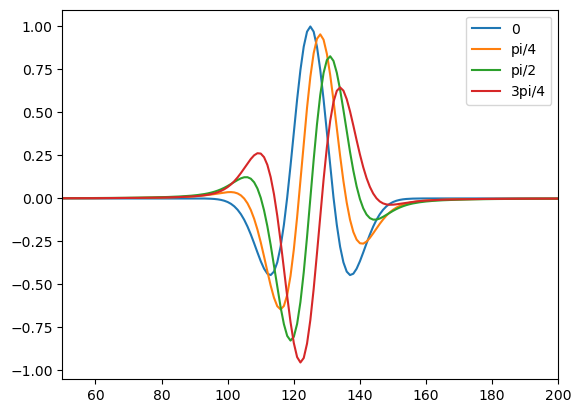

In [11]:
figure(2);close();figure(2);clf()
plot(wav1, label="0")
plot(wav2, label="pi/4")
plot(wav3, label="pi/2")
plot(wav4, label="3pi/4")
xlim(50,200)
legend()

if isinteractive() == false
  sleep(999999)
end